### Соотношение обучения и тестирования 70-30

In [1]:
##Загрузка пакетов программ
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 

In [2]:
## загрузка базы данных 
df = pd.read_csv('cleaned_work.csv',header=0)

In [3]:
df.drop(['Year'],axis=1, inplace=True)

In [4]:
df.head()

,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
0,Issyk_Kulsky_peg,Black Soil,31.0,13.0,811.2,68.0,980.0
1,Issyk_Kulsky_peg,Black Soil,30.5,16.0,811.2,72.0,670.0
2,Issyk_Kulsky_peg,Black Soil,29.5,14.0,811.2,68.0,730.0
3,Issyk_Kulsky_peg,Black Soil,30.0,13.0,811.2,54.0,710.0
4,Issyk_Kulsky_peg,Black Soil,31.0,12.0,811.2,70.0,780.0


In [5]:
### Разделение независимых и зависимых функций
X = df.iloc[:,:-1]
y = df.iloc[:, 6]

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X.head()

,Max_Temperature,Min_Teperature,Rainfall,Humidity,Location_Issyk_Kulsky_peg,Location_Jety_Ogyz_peg,Location_Tupsky_peg,Soil Type_Light Soil
0,31.0,13.0,811.2,68.0,1,0,0,0
1,30.5,16.0,811.2,72.0,1,0,0,0
2,29.5,14.0,811.2,68.0,1,0,0,0
3,30.0,13.0,811.2,54.0,1,0,0,0
4,31.0,12.0,811.2,70.0,1,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# Напечатаем  количество экземпляров обучающего и тестового набора (70-30)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5653, 8)
(2424, 8)
(5653,)
(2424,)


### Построение модели со случайным лесным регрессором

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

print('MSE =', mse(pred, y_test))
print('MAE =', mae(pred, y_test))
print('R2 Score =', r2_score(pred, y_test))

MSE = 517975.78111653996
MAE = 499.26591462033116
R2 Score = 0.4295585791956291


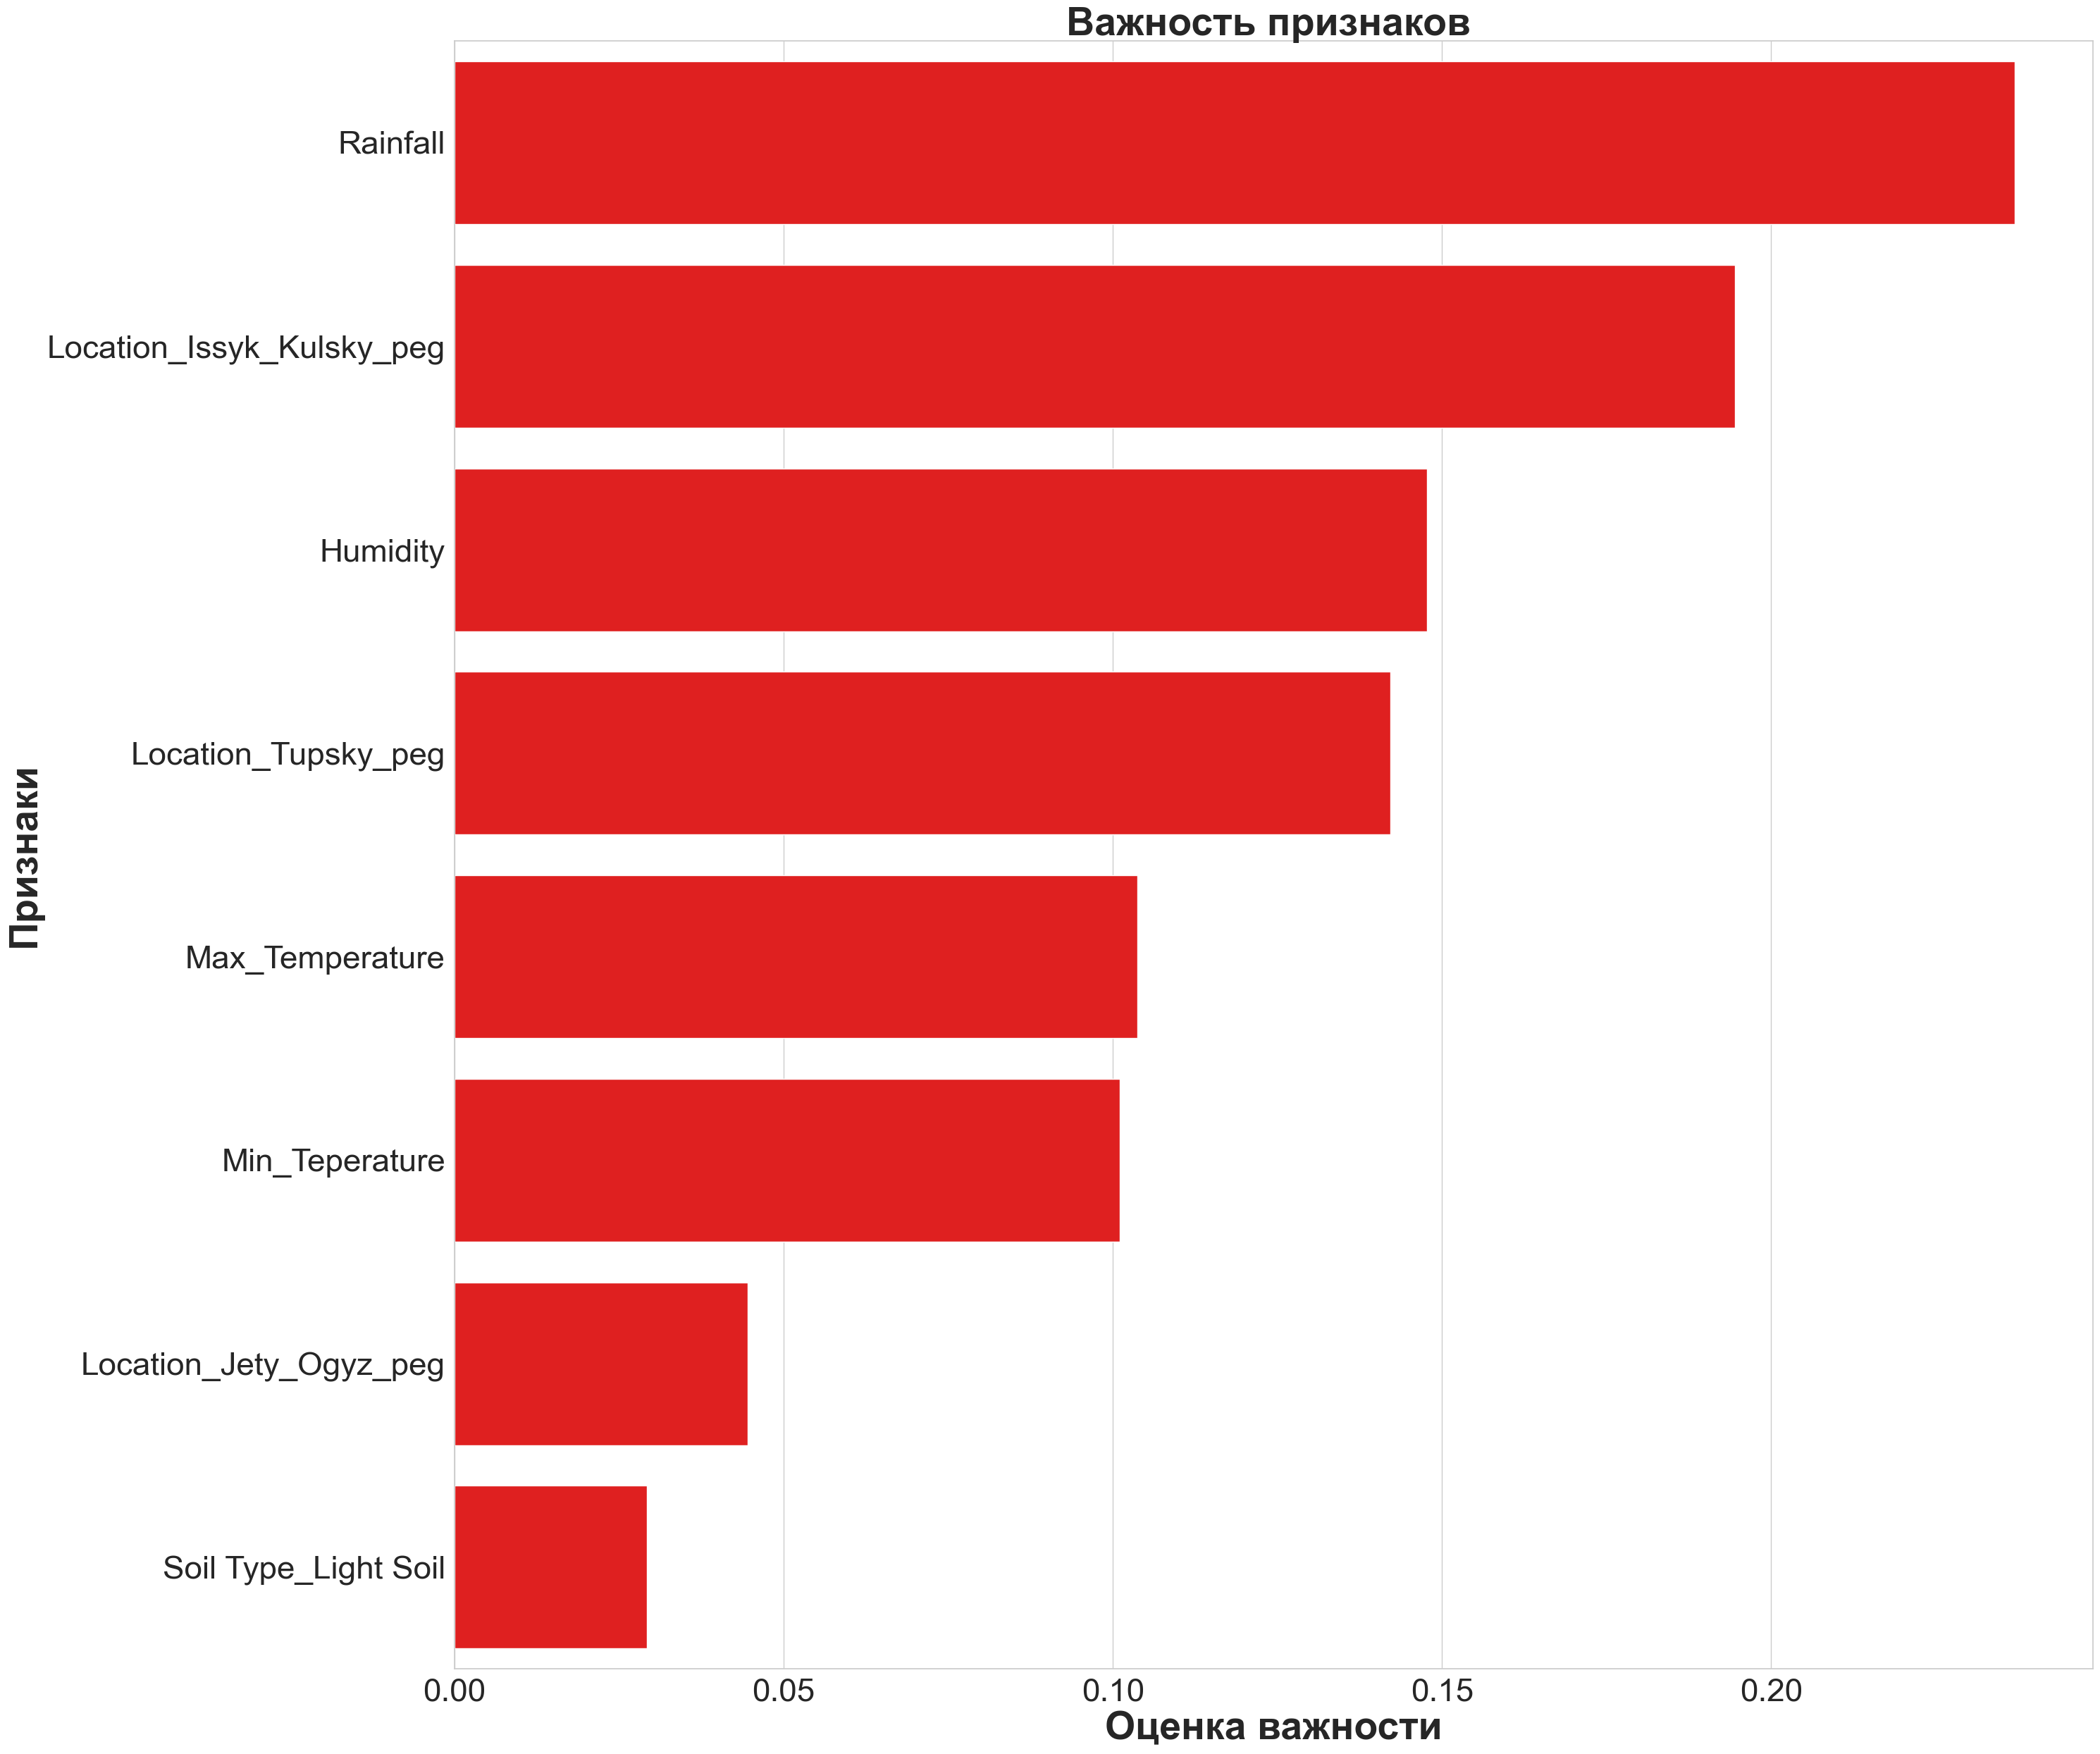

None

In [20]:
feats = {}
for feature, importance in zip(X.columns, RF.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 20)
sns.set(style="whitegrid", color_codes=True, font_scale = 3)
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='red')
plt.xlabel('Оценка важности', fontsize=40, weight = 'bold')
plt.ylabel('Признаки', fontsize=40, weight = 'bold')
plt.title('Важность признаков ', fontsize= 40, weight = 'bold')
display(plt.show())

### Построение модели с помощью AdaBoostRegressor

In [13]:
# Алгоритм AdaBoost  (70-30)
from sklearn.ensemble import AdaBoostRegressor
Adb = AdaBoostRegressor()
Adb.fit(X_train, y_train)
pred = Adb.predict(X_test)

print('MSE =', mse(pred, y_test))
print('MAE =', mae(pred, y_test))
print('R2 Score =', r2_score(pred, y_test))

MSE = 545486.6312765288
MAE = 556.6511189953811
R2 Score = 0.2659371501010517


# Построение модели с помощью GradientBoostingRegres


In [16]:
# Алгоритм GradientBoosting(70-30)
import time
from sklearn.ensemble import GradientBoostingRegressor
start_time = time.time()
GB = GradientBoostingRegressor() 
GB.fit(X_train, y_train) 
   
# Прогнозирование результатов набора тестов
y_pred = RF.predict(X_test)

print('MSE =', mse(y_pred, y_test))
print('MAE =', mae(y_pred, y_test))
print('R2 Score =', r2_score(y_pred, y_test))

MSE = 517975.78111653996
MAE = 499.26591462033116
R2 Score = 0.4295585791956291


In [17]:
import xgboost as xgb
import time
start_time = time.time()
model = xgb.XGBRegressor()
# feeding the training data into the model
model.fit(X_train, y_train)
# predicting the values for x-test
pred=model.predict(X_test)
print("Execution time: " + str((time.time() - start_time)) + ' sec')


print('MSE =', mse(pred, y_test))
print('MAE =', mae(pred, y_test))
print('R2 Score =', r2_score(pred, y_test))

Execution time: 0.11595034599304199 sec
MSE = 499838.3341847741
MAE = 503.98777156025665
R2 Score = 0.43186285449140827


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)